In [1]:
from langgraph.graph import StateGraph,START,END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
model=ChatOpenAI()

In [4]:
class BlogState(TypedDict):
    title:str
    outline:str
    content:str

In [5]:
def create_outline(state:BlogState)->BlogState:
    title= state['title']
    prompt = f'Generate a outline for a blog on the following topic {title}'
    result= model.invoke(prompt)
    state['outline']=result.content
    return state

In [12]:
def create_blog(state:BlogState)->BlogState:
    title = state['title']
    outline=state['outline']
    prompt=f'Write a detailed blog on {title} using the following outline \n {outline}'
    result=model.invoke(prompt)
    state['content']=result.content
    return state

In [13]:
graph= StateGraph(BlogState)

graph.add_node('create_outline',create_outline)
graph.add_node('create_blog',create_blog)
graph.add_edge(START,'create_outline')
graph.add_edge('create_outline','create_blog')
graph.add_edge('create_blog',END)

workflow=graph.compile()


In [14]:
intial_state={'title':'Rise of AI in India'}
final_state=workflow.invoke(intial_state)
final_state


{'title': 'Rise of AI in India',
 'outline': 'I. Introduction \n- Definition of artificial intelligence (AI) \n- Overview of the rise of AI globally \n- Introduction to the increasing adoption of AI in India \n\nII. The Current State of AI in India \n- Statistics on AI adoption in various industries in India \n- Key players in the Indian AI market \n- Government initiatives to promote AI in India \n\nIII. Impact of AI on Indian Industries \n- AI in healthcare \n- AI in finance \n- AI in education \n- AI in agriculture \n- AI in retail \n\nIV. Challenges and Opportunities in the AI Sector in India \n- Talent shortage in the AI sector \n- Ethical concerns surrounding AI implementation \n- Opportunities for growth and innovation in the Indian AI market \n\nV. Future Trends in AI in India \n- Predictions for the growth of the AI market in India \n- Emerging technologies in the AI sector \n- Potential areas for AI expansion in India \n\nVI. Conclusion \n- Recap of key points discussed \n- F

In [16]:
print(final_state['outline'])

I. Introduction 
- Definition of artificial intelligence (AI) 
- Overview of the rise of AI globally 
- Introduction to the increasing adoption of AI in India 

II. The Current State of AI in India 
- Statistics on AI adoption in various industries in India 
- Key players in the Indian AI market 
- Government initiatives to promote AI in India 

III. Impact of AI on Indian Industries 
- AI in healthcare 
- AI in finance 
- AI in education 
- AI in agriculture 
- AI in retail 

IV. Challenges and Opportunities in the AI Sector in India 
- Talent shortage in the AI sector 
- Ethical concerns surrounding AI implementation 
- Opportunities for growth and innovation in the Indian AI market 

V. Future Trends in AI in India 
- Predictions for the growth of the AI market in India 
- Emerging technologies in the AI sector 
- Potential areas for AI expansion in India 

VI. Conclusion 
- Recap of key points discussed 
- Final thoughts on the rise of AI in India and its implications for the futur

In [17]:
print(final_state['content'])

Artificial Intelligence (AI) is a rapidly growing field that involves the development of machines and systems that can mimic human intelligence and perform tasks that typically require human intelligence. The rise of AI globally has been exponential, with advancements in machine learning, natural language processing, and robotics. In India, there has been a noticeable increase in the adoption of AI across various industries, marking a significant shift in the country's technological landscape.

The Current State of AI in India:
Statistics indicate that the adoption of AI in India is steadily increasing, with industries such as manufacturing, healthcare, finance, education, agriculture, and retail leading the way. Key players in the Indian AI market include both multinational companies and startups, who are actively involved in developing and implementing AI solutions. Additionally, the Indian government has launched several initiatives to promote the growth of AI in the country, such a

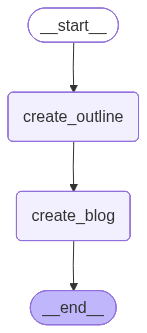

In [9]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())